#### 01. Import Dependencies


In [5]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### 02. Basic Processing

In [3]:
df = pd.read_csv('data/processed/ChurnModelling_Missing_Values_Handled.csv')
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.00,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41.00,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42.00,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,38.91,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43.00,2,125510.82,1,1,1,79084.10,0


In [ ]:
print(f"No of Rows : {len(df)}")

No of Rows : 10000


#### 03. Outlier Detection Techniques

##### 03.1 Distribution Plots 

In [25]:
categorical_columns = [
                        'Geography', 
                        'Gender', 'HasCrCard',
                        'IsActiveMember', 'Exited'
                    ]
numerical_columns = [
                        'Age', 'Tenure', 'CreditScore',
                        'Balance', 'EstimatedSalary', 'NumOfProducts'
                    ]

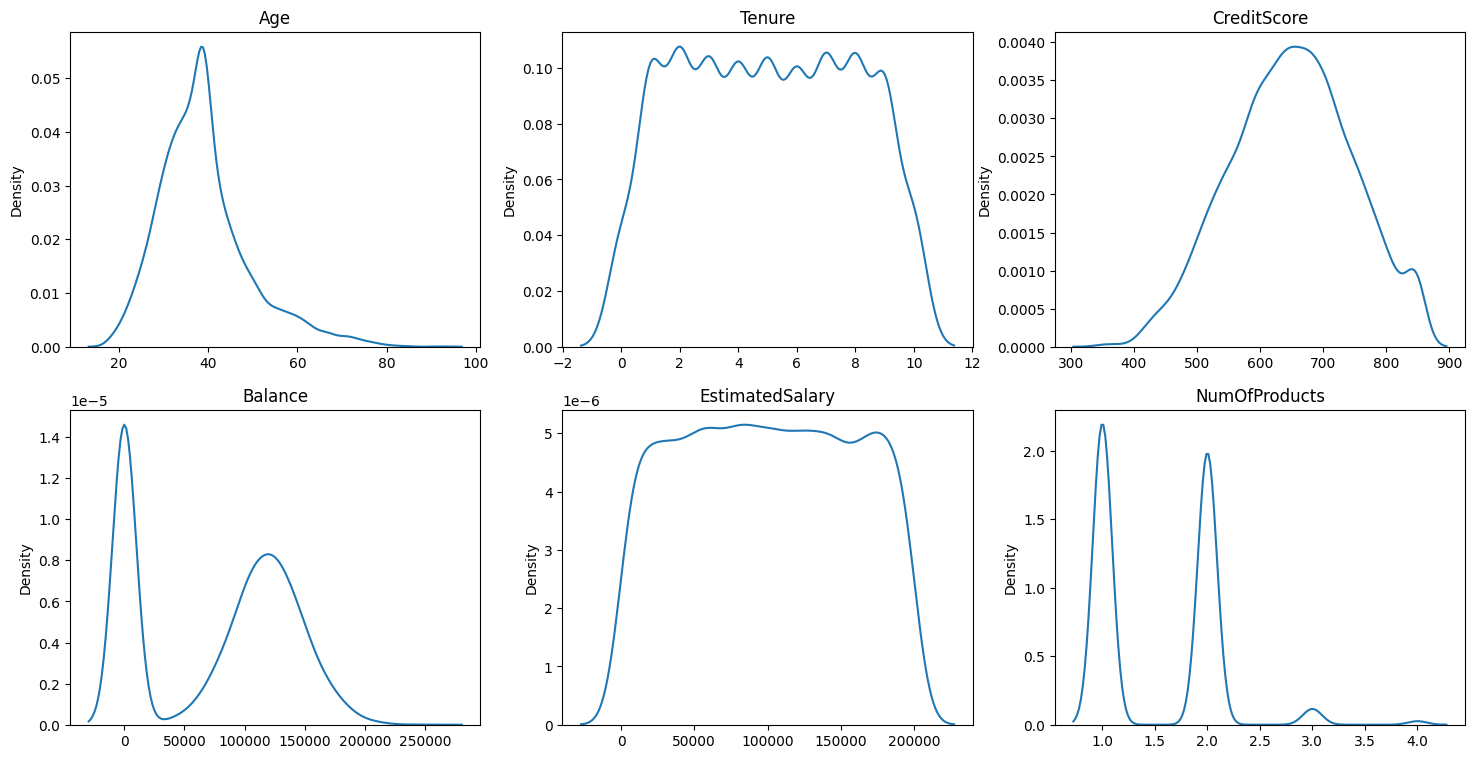

In [17]:
fig, axes = plt.subplots(2, 3, figsize=(18, 9))
axes = axes.flatten()
for idx, col in enumerate(numerical_columns):
    sns.kdeplot(
                data=df[col],
                ax=axes[idx]
                )
    axes[idx].set_title(col)
    axes[idx].set_xlabel(' ')
plt.show()

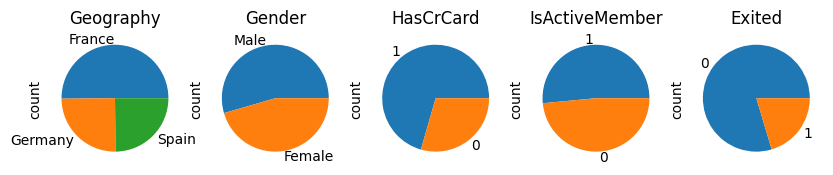

In [28]:
fig, axes = plt.subplots(1, 5, figsize=(10, 8))

for idx, col in enumerate(categorical_columns):
    df[col].value_counts().plot(
                                kind='pie',
                                ax=axes[idx]
                                )
    axes[idx].set_title(col)
    axes[idx].set_xlabel('')

plt.show()

##### 03.2 Box Plots 

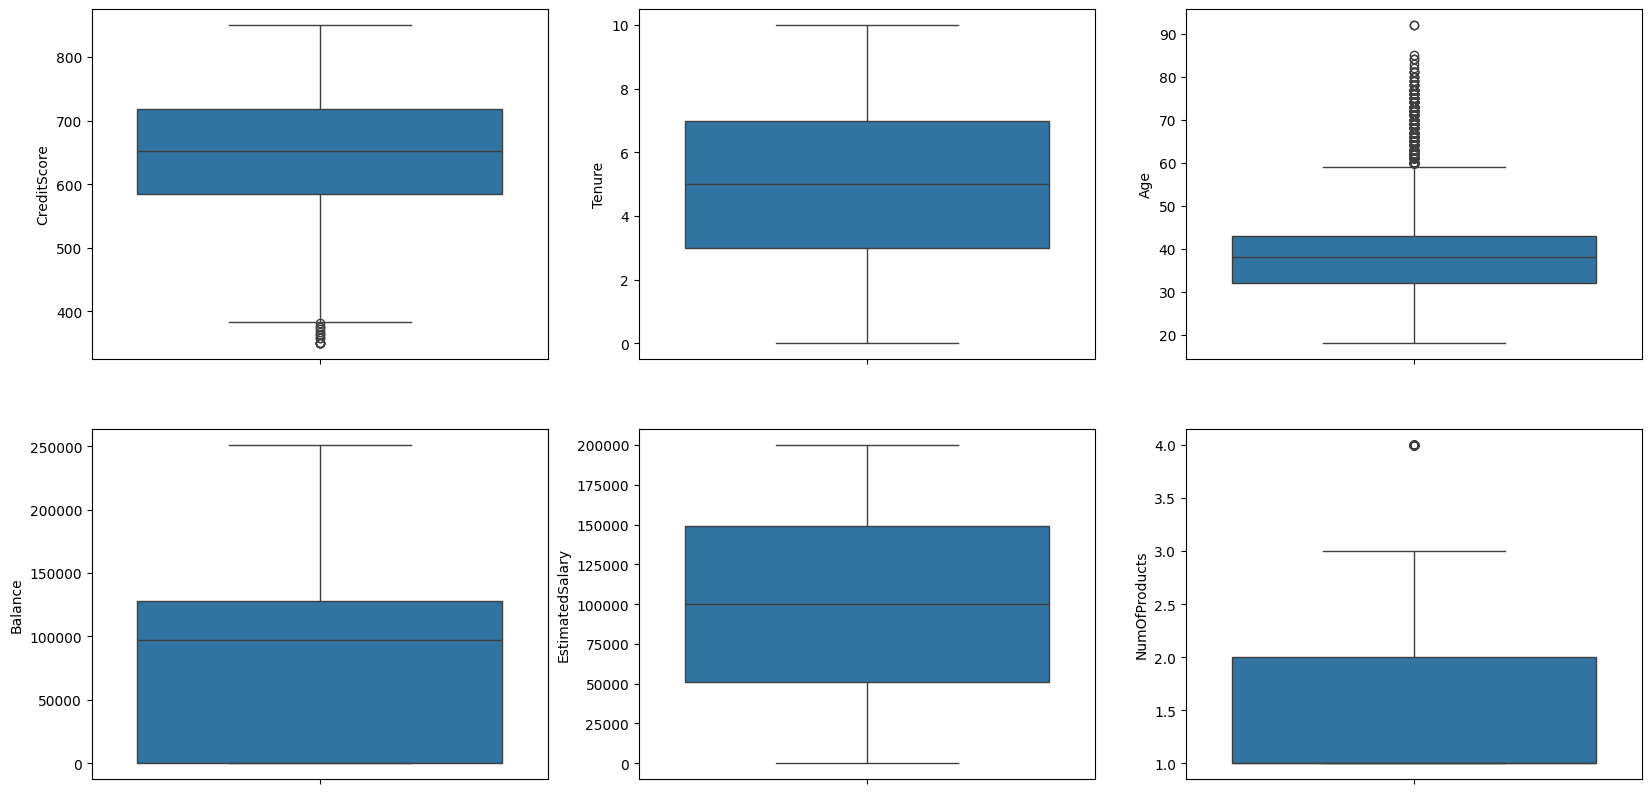

In [33]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

sns.boxplot(data=df['CreditScore'], ax=axes[0,0])
sns.boxplot(data=df['Tenure'], ax=axes[0,1])
sns.boxplot(data=df['Age'], ax=axes[0,2])
sns.boxplot(data=df['Balance'], ax=axes[1,0])
sns.boxplot(data=df['EstimatedSalary'], ax=axes[1,1])
sns.boxplot(data=df['NumOfProducts'], ax=axes[1,2])

plt.show()

##### 03.3 Empirical Rule / 3-Sigma Rule

In [34]:
def find_anomaly(data):

    mean = data.mean()
    std = data.std()
    upper_bound = mean + (3 * std)
    lower_bound = mean - (3 * std)

    return (data > upper_bound) | (data < lower_bound)

In [35]:
numerical_columns = [
                        'Age', 'Tenure', 'CreditScore',
                        'Balance', 'EstimatedSalary'
                    ]

for col in numerical_columns:
    n_outliers = find_anomaly(df[col]).sum()
    n_outlier_percentage = round(n_outliers / len(df), 3)
    print(f"{col} : {n_outliers} outliers ({n_outlier_percentage} %)")


Age : 144 outliers (0.014 %)
Tenure : 0 outliers (0.0 %)
CreditScore : 8 outliers (0.001 %)
Balance : 0 outliers (0.0 %)
EstimatedSalary : 0 outliers (0.0 %)


##### 03.4 IQR Method

In [36]:
def find_anomaly(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)

    IQR = Q3 - Q1

    upper_bound = Q3 + 1.5 * IQR 
    lower_bound = Q1 - 1.5 * IQR 

    return (data > upper_bound) | (data < lower_bound)

In [37]:
numerical_columns = [
                        'Age', 'Tenure', 'CreditScore',
                        'Balance', 'EstimatedSalary'
                    ]

for col in numerical_columns:
    n_outliers = find_anomaly(df[col]).sum()
    n_outlier_percentage = round(n_outliers / len(df), 3)
    print(f"{col} : {n_outliers} outliers ({n_outlier_percentage} %)")

Age : 501 outliers (0.05 %)
Tenure : 0 outliers (0.0 %)
CreditScore : 15 outliers (0.002 %)
Balance : 0 outliers (0.0 %)
EstimatedSalary : 0 outliers (0.0 %)


In [38]:
df.to_csv('data/processed/ChurnModelling_Outliers_Handled.csv', index=False)